In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import Dataset
import numpy as np

In [3]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-05-20 21:33:08--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-05-20 21:33:08--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.6’

MNIST.tar.gz.6          [              <=>   ]  33.20M   596KB/s    in 84s     

2021-05-20 21:34:32 (406 KB/s) - ‘MNIST.tar.gz.6’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/

In [4]:
from torchvision.datasets import MNIST

transform = transforms.Compose([transforms.ToTensor()])

train_set = MNIST(root = './', train=True, download=True, transform=transform)
val_set = MNIST(root = './', train=False, download=True, transform=transform)

In [5]:
import random
class custom_dataset(Dataset):
    def __init__(self):
        self.data = MNIST(root = './', train=True, download=True, transform=transform)
    
    def __getitem__(self,index):
        r = next(iter(self.data))
        image,label= r
        random_int = random.randint(0,9)
        labels = label,label+random_int
        return (image,random_int,labels)
    
    def __len__(self):
        return len(self.data)
    

In [6]:
custom = custom_dataset()
next(iter(custom))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# train_set= torchvision.datasets.MNIST(root='./data',train=True,\
#             download=True, transform = transforms.Compose([transforms.ToTensor()]))

In [7]:
import matplotlib.pyplot as plt
plt.imshow(transforms.ToPILImage()(next(iter(train_set))[0]), interpolation="bicubic")

In [8]:
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)
train_loader = torch.utils.data.DataLoader(custom, batch_size=10, shuffle=True)


In [ ]:
# next(iter(train_loader))

In [9]:
train_set.train_labels.bincount()

/home/anuda/anaconda3/envs/pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [10]:
images,randoms,labels = next(iter(train_loader))

In [ ]:

grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:', labels)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=121,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=20)
        self.out2 = nn.Linear(in_features=120,out_features=10)
        
    def forward(self,t,x):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2, stride=2)
        
        t = t.reshape(-1,12*4*4)
        
        t = self.fc1(t)
        t = F.relu(t)
        
        out2 = self.out2(t)
        out2 = F.log_softmax(out2)

        t = torch.cat(([t, torch.unsqueeze(x,dim=1)]), 1)

        t = self.fc2(t)
        t = F.relu(t)
        
        t=self.out(t)
        
        return out2,t
        
        
        

In [14]:
network = Network()
for name,param in network.named_parameters():
    print(name,' : ',param.shape)

conv1.weight  :  torch.Size([6, 1, 5, 5])
conv1.bias  :  torch.Size([6])
conv2.weight  :  torch.Size([12, 6, 5, 5])
conv2.bias  :  torch.Size([12])
fc1.weight  :  torch.Size([120, 192])
fc1.bias  :  torch.Size([120])
fc2.weight  :  torch.Size([60, 121])
fc2.bias  :  torch.Size([60])
out.weight  :  torch.Size([20, 60])
out.bias  :  torch.Size([20])
out2.weight  :  torch.Size([10, 120])
out2.bias  :  torch.Size([10])


In [15]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [16]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [17]:
for batch in train_loader:
    print(type(batch))
    break

<class 'list'>


In [27]:
train_loader = torch.utils.data.DataLoader(custom, batch_size=100,shuffle=True)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct1 = 0
    total_correct2 = 0

    for batch in train_loader: # Get Batch
#         print(len(batch))
        images,randoms ,labels = batch
#         print(randoms)
#         print(labels)
        
        

        preds = network(images,randoms) # Pass Batch
#         print(preds)

        loss1 = F.cross_entropy(preds[0], labels[0]) # Calculate Loss
        loss2 = F.cross_entropy(preds[1], labels[1])
        loss = (loss1+loss2)/2
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
#         print('-'*20)
#         break
        total_loss += loss.item()
        total_correct1 += get_num_correct(preds[0], labels[0])
        total_correct2+= get_num_correct(preds[1], labels[1])                                 

    print(
        "epoch", epoch, 
        "total_correct1:", total_correct1,
        "total_correct2:", total_correct2,
        "loss:", total_loss
    )

/home/anuda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct1: 60000 total_correct2: 60000 loss: 0.34456286524800817
epoch 1 total_correct1: 60000 total_correct2: 60000 loss: 0.028328450922344928
epoch 2 total_correct1: 60000 total_correct2: 60000 loss: 0.010201395859439799
epoch 3 total_correct1: 60000 total_correct2: 60000 loss: 0.0050130647969126585
epoch 4 total_correct1: 60000 total_correct2: 60000 loss: 0.002833177005413745
epoch 5 total_correct1: 60000 total_correct2: 60000 loss: 0.0017482609796388715
epoch 6 total_correct1: 60000 total_correct2: 60000 loss: 0.0011323551909754315
epoch 7 total_correct1: 60000 total_correct2: 60000 loss: 0.0007567249110707053
epoch 8 total_correct1: 60000 total_correct2: 60000 loss: 0.0005128682290660436
epoch 9 total_correct1: 60000 total_correct2: 60000 loss: 0.0003585837141883985


In [28]:
image,randoms,label = next(iter(custom))

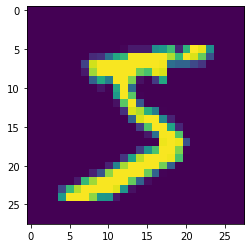

In [30]:
plt.imshow(image.squeeze(0).cpu())

In [38]:
randoms=3
ops = network(image.unsqueeze(0),torch.tensor(randoms).unsqueeze(0))
print(F.softmax(ops[0]).argmax(dim=1),randoms,F.softmax(ops[1]).argmax(dim=1))

tensor([5]) 3 tensor([8])


/home/anuda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/anuda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
label

In [35]:
randoms

9